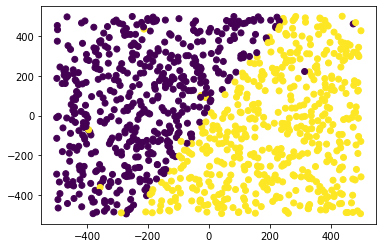

In [2]:
# Generate the source data

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

nsamples = 1000    # number of samples in data set
noiselevel = .01  # chance that a data point gets assigned with a reversed class than dictated by the model

x = np.random.rand(nsamples) * 1000 - 500
y = np.random.rand(nsamples) * 1000 - 500

Group = np.ones(nsamples)
for i in range(nsamples):
    if (4*x[i]-2*y[i]+.8 < 0):
        Group[i] = 1
    else:
        Group[i] = 2

# noisify the data
for i in range(nsamples):
    if np.random.rand() <= noiselevel:
        if Group[i] == 1:
            Group[i] = 2
        else:
            Group[i] = 1


#Data = np.column_stack((x,y))

# let's plot it to get a visual impression
plt.scatter(x,y,c=Group)

In [3]:
#Perceptron definition as an object
class Perceptron:
    """Randomly initialized perceptron with "IputLength" inputs. Sigmoid activation"""
    def __init__(self, input_length):
        self.input_length = input_length
        self.w = np.random.rand(input_length)
        self.bias = np.random.rand()
    
    def Evaluate(self, x, test_w = None, test_bias = None):
        """
        Evaluates the Perceptron output given the InputLength's sized X input.
        Can receive a new set of w and bias to be evaluated
        """
        if test_w is not None and test_bias is not None:
            w, bias = test_w, test_bias
        else:
            w, bias = self.w, self.bias
            
        Evaluation = self._ActivationFunction(bias + np.dot(x,w))
        return Evaluation
    
    def Update(self, new_w, new_bias):
        self.w = new_w
        self.bias = new_bias
        
    def _ActivationFunction(self,Input):
        """Sigmoid activation function"""
        Output = 1 / ( 1 + np.exp(-Input) )
        return Output

#Class prediction function as asked
def ClassPredictionFunction(PerceptronOutputs):
    """Returns 1 if 𝑜𝑢𝑡𝑝𝑢𝑡<.5 , return 2 if 𝑜𝑢𝑡𝑝𝑢𝑡>.5 and 0 if 𝑜𝑢𝑡𝑝𝑢𝑡=.5"""
    Classification = [1 if x < 0.5 else (2 if x > 0.5 else 0) for x in PerceptronOutputs]
    return Classification

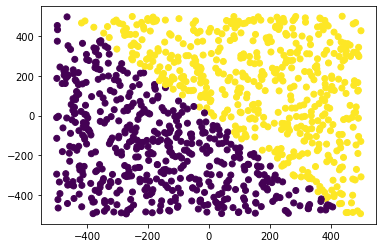

In [4]:
#Data processing
Data = np.column_stack((x,y))
InputLength = len(Data[0])

#Algorithm evaluation
SinglePerceptron = Perceptron(InputLength)
PerceptronOutputs = [SinglePerceptron.Evaluate(Row) for Row in Data]
ModelClassification = ClassPredictionFunction(PerceptronOutputs)

#Data visualisation
plt.scatter(x,y,c=ModelClassification)

In [5]:
#Functions definition
def Loss(Data, Perceptron, TrainingClass, NewW = None, NewBias = None):
    """"""
    N = len(TrainingClass)    
    PerceptronOutputs = [Perceptron.Evaluate(Row,NewW,NewBias) for Row in Data]
    ModelClassification = ClassPredictionFunction(PerceptronOutputs)
    #Loss = sum([pow((TrainingClass[i] - ModelClassification[i]),2) for i in range(N)])
    Loss = np.sum(np.square(np.array(TrainingClass) - np.array(ModelClassification)))
    return Loss

def GradientCalculation(Data, Perceptron, TrainingClass, Epsilon):
    """Simple gradient calculation skipping partial derivatives"""
    GradientList = []
    
    #Upper and lower boundaries with epsilon for each w
    for i,W in enumerate(Perceptron.w):
        UpperW = [x for x in Perceptron.w]
        UpperW[i] = UpperW[i] + Epsilon
        LowerW = [x for x in Perceptron.w]
        LowerW[i] = LowerW[i] - Epsilon
        Gradient = (Loss(Data,Perceptron,TrainingClass,UpperW,Perceptron.bias) - Loss(Data,Perceptron,TrainingClass,LowerW,Perceptron.bias))/ (2*Epsilon)
        GradientList.append(Gradient)
        
    #Upper and lower boundaries with epsilon for the bias
    UpperBias = Perceptron.bias + Epsilon
    LowerBias = Perceptron.bias - Epsilon
    BiasGradient = (Loss(Data,Perceptron,TrainingClass,Perceptron.w,UpperBias) - Loss(Data,Perceptron,TrainingClass,Perceptron.w,LowerBias))/ (2*Epsilon)
    GradientList.append(BiasGradient)
    return GradientList


In [6]:
#Variables initialisation
Epsilon = 0.01
LearningRate = 0.00001
SinglePerceptron = Perceptron(InputLength)

#Verifying if the new model indeed reduced the loss
InitialLoss = Loss(Data, SinglePerceptron, Group)
print("InitialLoss:", InitialLoss)

Gradient = GradientCalculation(Data, SinglePerceptron, Group, Epsilon)
print("Gradient", Gradient)
NewW = [SinglePerceptron.w[i] - LearningRate * Gradient[:-1][i] for i in range(InputLength)]
NewBias = SinglePerceptron.bias - LearningRate * Gradient[-1]
SinglePerceptron.Update(NewW, NewBias)
NewLoss = Loss(Data, SinglePerceptron, Group)
print("NewLoss:", NewLoss)

InitialLoss: 131.0
Gradient [0.0, 250.0, 0.0]
NewLoss: 129.0


In [16]:
#Fitting model
NewPerceptron = Perceptron(InputLength)
LossHistory = [np.inf]
WHistory = []
BiasHistory = []
for i in range(1000):
    LossHistory.append(Loss(Data, NewPerceptron, Group))
    WHistory.append(NewPerceptron.w)
    BiasHistory.append(NewPerceptron.bias)
    Gradient = GradientCalculation(Data, NewPerceptron, Group, Epsilon)
    NewW = [NewPerceptron.w[i] - LearningRate * Gradient[:-1][i] for i in range(InputLength)]
    NewBias = NewPerceptron.bias - LearningRate * Gradient[-1]
    NewPerceptron.Update(NewW, NewBias)
    if np.mean(np.array(LossHistory[1:][-40:])) - LossHistory[-1] < 0.01 and len(LossHistory) > 10:
        print("Convergence break in iteration",i)
        break
print("Final loss:",LossHistory[-1])

Convergence break in iteration 488
Final loss: 10.0


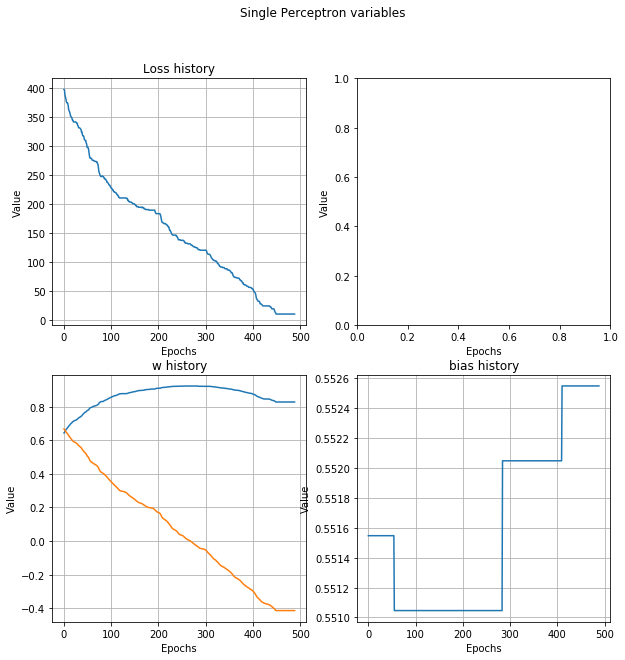

In [17]:
#Showing loss historical data

fig, axs = plt.subplots(2,2)
fig.suptitle("Single Perceptron variables")
fig.set_size_inches(10, 10)

axs[0,0].plot(LossHistory[1:])
axs[0,0].set_title("Loss history")
axs[0,0].grid()

axs[1,0].plot(WHistory)
axs[1,0].set_title("w history")
axs[1,0].grid()

axs[1,1].plot(BiasHistory)
axs[1,1].set_title("bias history")
axs[1,1].grid()

for ax in axs.flat:
    ax.set(xlabel="Epochs", ylabel='Value')

Final model accuracy: 0.99


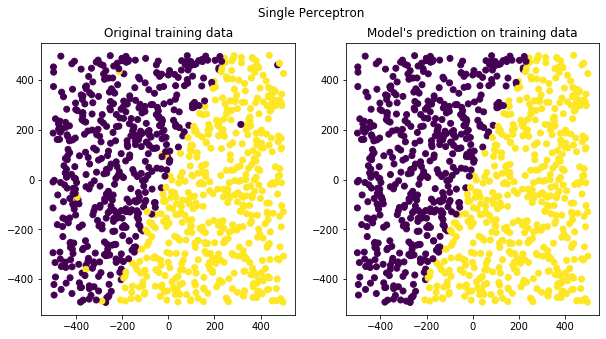

In [18]:
#Final Evaluation
PerceptronOutputs = [NewPerceptron.Evaluate(Row) for Row in Data]
ModelClassification = ClassPredictionFunction(PerceptronOutputs)

#Data visualisation
fig, axs = plt.subplots(1,2)
fig.suptitle("Single Perceptron")
fig.set_size_inches(10, 5)

axs[0].scatter(x,y,c=Group)
axs[0].set_title("Original training data")

axs[1].scatter(x,y,c=ModelClassification)
axs[1].set_title("Model's prediction on training data")

print("Final model accuracy:", np.mean(Group == ModelClassification))

In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

#Variable initialisation
TestProportion = 0.2

# we define our input features as a single multi-dimensional array by 'stacking' them into columns
X = np.column_stack((x,y))
# we also define our output feature, simply for the sake of convenience
Y = Group

# split data into 80% training and 20% testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = TestProportion)

# define a new MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(2), activation="logistic", solver="sgd", batch_size=1, learning_rate_init=0.0001)

# fit the classifier to the training data
MLP.fit(X_train,Y_train)

# print out mean accuracy of that trained model on the testing data
print("Model mean accuracy", MLP.score(X_test, Y_test))

# plot the model's predictions on the testing data
Y_predicted = MLP.predict(X_test)


Model mean accuracy 0.94


Text(0.5, 1.0, "Model's prediction on test data")

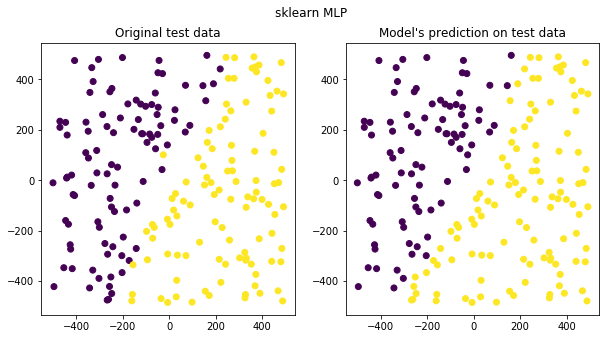

In [20]:
x0_test = [x[0] for x in X_test]
x1_test = [x[1] for x in X_test]

fig, axs = plt.subplots(1,2)
fig.suptitle("sklearn MLP")
fig.set_size_inches(10, 5)

axs[0].scatter(x0_test,x1_test,c=Y_test)
axs[0].set_title("Original test data")

axs[1].scatter(x0_test,x1_test,c=Y_predicted)
axs[1].set_title("Model's prediction on test data")

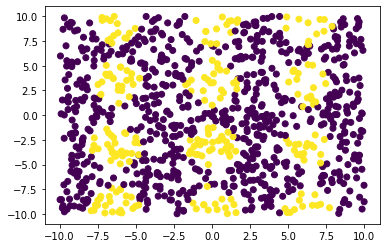

In [21]:
feateng_nsamples = 1000

feateng_x = np.random.rand(feateng_nsamples) * 20 - 10
feateng_y = np.random.rand(feateng_nsamples) * 20 - 10

feateng_group = np.ones(feateng_nsamples)

for i in range(feateng_nsamples):
    if ( 0.6*np.cos(feateng_x[i]) - 0.4*np.cos(feateng_y[i]) - .3 < 0):
        feateng_group[i] = 1
    else:
        feateng_group[i] = 2
        
feateng_data = np.column_stack((feateng_x, feateng_y, feateng_group))
plt.scatter(feateng_x, feateng_y, c=feateng_group)

In [22]:
feateng_cosx = np.cos(feateng_x)
feateng_cosy = np.cos(feateng_y)
feateng_data = np.column_stack((feateng_x, feateng_y, feateng_cosx, feateng_cosy, feateng_group))

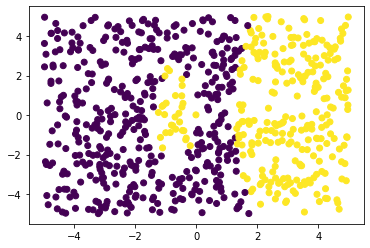

In [23]:
mydata = np.genfromtxt('t4_data.csv', delimiter=',')
plt.scatter(mydata[:,0], mydata[:,1], c=mydata[:,2])

In [24]:
import math

#feature engineering
feateng_logx1 = [math.log(abs(x)) for x in mydata[:,0]]
feateng_logx2 = [math.log(abs(x)) for x in mydata[:,1]]
feateng_cosx1 = np.cos(mydata[:,0])
feateng_cosx2 = np.cos(mydata[:,1])
feateng_data = np.column_stack((mydata[:,0], mydata[:,1], feateng_logx1, feateng_logx2, feateng_cosx1, feateng_cosx2))

# split data into 80% training and 20% testing sets
X_train, X_test, Y_train, Y_test = train_test_split(feateng_data, mydata[:,2], test_size = TestProportion)


# define a new MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(5), activation="relu", solver="adam", batch_size=1, learning_rate_init=0.0001)

# fit the classifier to the training data
MLP.fit(X_train,Y_train)

# print out mean accuracy of that trained model on the testing data
print("Model mean accuracy", MLP.score(X_test, Y_test))

# plot the model's predictions on the testing data
Y_predicted_train = MLP.predict(X_train)
Y_predicted_test = MLP.predict(X_test)


Model mean accuracy 0.9714285714285714


//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0.5, 1.0, "Model's prediction on test data")

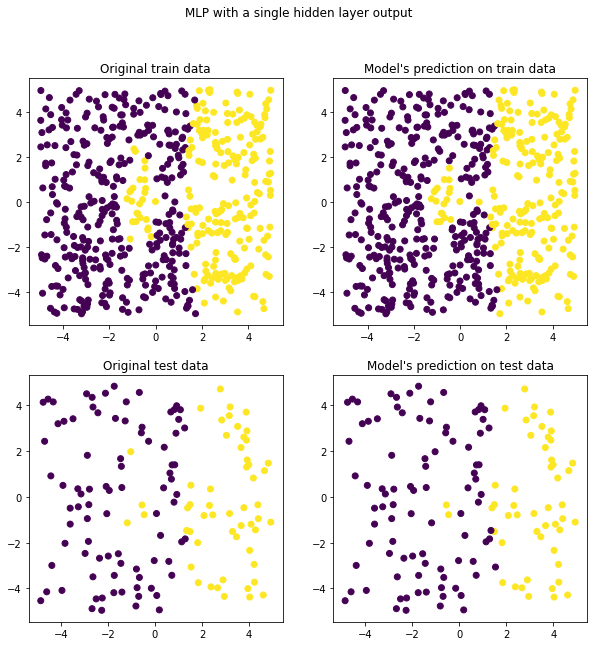

In [25]:
fig, axs = plt.subplots(2, 2)
fig.suptitle("MLP with a single hidden layer output")
fig.set_size_inches(10, 10)

axs[0, 0].scatter(X_train[:,0],X_train[:,1],c=Y_train)
axs[0, 0].set_title("Original train data")

axs[0, 1].scatter(X_train[:,0],X_train[:,1],c=Y_predicted_train)
axs[0, 1].set_title("Model's prediction on train data")

axs[1, 0].scatter(X_test[:,0],X_test[:,1],c=Y_test)
axs[1, 0].set_title("Original test data")

axs[1, 1].scatter(X_test[:,0],X_test[:,1],c=Y_predicted_test)
axs[1, 1].set_title("Model's prediction on test data")